# **Clinching Through the Press: A Network Analysis of Public Boxing Challenges in Central Chile, 1920–1930**

**Hernán Adasme**

George Mason University

**Abstract**
>This poster explores public boxing challenges in Chilean newspapers using social network analysis. It examines networks among boxers, the centrality of crucial actors in the boxing circuit, and the role of the printing press as brokers in the emerging boxing circuit in Santiago and nearby cities during the 1920s. 

In [ ]:
**Introduction**

>The 1920s  witnessed an explosion of boxing spectacles in Central Chile’s major cities and nearby towns, including Santiago, Valparaíso, Rancagua and San Felipe. For emerging boxers, publishing a boxing challenge in the printing press was one of the most frequent ways of arranging a fight. Boxing challenges were advertised in the specialized sporting press like Revista Los Sports, and also in traditional newspapers such as El Mercurio de Valparaíso y La Nación. A boxing challenge was usually a brief note in a printed publication, in which a boxer would invite another sportsman to arrange a fight and sign a contract in the presence of a manager. Occasionally, a boxing challenge would specify the fight’s conditions, but most of the time characteristics of a bout would be sanctioned when the contract was signed. 
>Public boxing challenges were mostly used by emerging boxers, both professionals and aficionados, to get in contact with other athletes, build a fighting record, gain experience, and eventually start a career in the ring. The data includes challenges amongst kids as young as 7 years old and also female boxers. Boxers would select their contendants according to weight and experience, yet no strict regulations were abided by all the challengers. Although professional boxers would also challenge each other publicly, they had more formalized ways of arranging and promoting a fight that involved other actors in the industry --boxing entrepreneurs, professional managers, and boxing promoters-- and had extensive media coverage. For boxing enthusiasts and wanna-be professionals, the absence of established governing bodies gave them relative freedom to challenge each other, and set the conditions of the fights without observing established regulations.

<div>
<img src="attachment:Screen%20Shot%202022-12-16%20at%2012.23.27%20PM.png" width="250"/>
</div>

>The printing press played a crucial role in the development of emerging boxing circuits. As sports scholars have pointed out, the development of boxing and modern sports is intimately related to the emergence of mass media and the commercialization of sporting activities. Although the role of the media has been underscored to explain the rise of professional boxing at a national level, this project argues that the printing press was a crucial component of the massification of local non-professional and emerging boxing. Sporting publications and newspapers operated as brokers and intermediaries between boxers, managers and boxing clubs. Newspapers and magazines would both publicize a challenge and publish a boxer's response to a defiance. Newspaper’s offices served as the meeting point for boxers and their managers to sign contracts. During the 1920’s the public platform provided by the press bestowed challenges with a certain degree of public legitimacy, in the absence of sports governing bodies sanctioning a match contract. The role played by the press, both in Santiago and nearby towns, made it possible for boxing practitioners to create emerging circuits and offer boxing spectacles to a sporting audience that grew alongside the industrialization of urban centers. 

>This poster will use social network analysis to describe the growing amateur boxing circuit in central Chile, during the 1920s. By using public boxing challenges as a pivotal connection between boxers and their managers, this poster displays a digital representation of the networks that shaped the emerging amateur boxing community in Santiago and nearby cities. Social network analysis provides a useful approach to identify particular cliques within the boxing community and to evaluate how well-connected boxers occupied central positions within the emerging boxing spectacle circuit. It also allows for the identification of marginalized actors operating in the periphery of the boxing circuit as well as the level of permeability of centralized positions. The research offers visualizations of the network of challenges, the relative centrality of certain individuals, and the relevance of some sport publications over other media sources for the advertising of boxing challenges. It will also provide a contextualization of the historical phenomena under scrutiny and selected pictures of the boxers and their manage


**The Data**

>I have collected the data from digitized newspapers and sporting magazines published in Santiago and nearby urban areas between 1920 and 1930. I stored each public challenge in an online relational database created in Heurist, that identifies the challenging boxer, his manager and location, the challenged boxer, the terms of the fight (including the cash prize at stake, and the number of rounds, if available), the response to the challenge, the newspaper advertising the challenge and the date. The challenges' data is part of a larger database that aims to capture events, actors and organizations related to amateur boxing activities in Chile, throughout the 1920's decade. As the image below shows, the database captures the names of the boxers (as a foreign key from the database's boxers's table), the source and the source's date, the status (either accepted or rejected), the conditions of the fight, the basis, city and geoespatial data of the precise location of the contract meeting when provided, and the name of the manager if mentioned by the source. 

>This research aims to analyze the networks created by boxers through the mutual exchange of public challenges. A public boxing challenge is one of the many connecting links between two participants in the emerging boxing circuit. Actual fights --recorded by boxing databases-- and affiliation to a boxing club are other forms of interconnection between boxing practitioners. This research argues that, before the consolidation of professional and amateur governing bodies, public challenges confered a certain degree of formality to a practice moving towards acquiring the elements of modern sports: rationalization, bureaucratizarion, and growing commercialization. 

>This exploratory piece will explore the metodologies of social network analysis to examine the links between boxers build through the circulation of challenges. The research aims to analyze the networks by creating visualizations to discover hidden patterns, to examine te relative centrality of certain individuals, and to asses the relevance of some sport publications over other media sources for the advertising of boxing challenges.

**Boxing Challenges - Network Analysis**
>The data consist in 178 public challenges collected from digitized newspapers and sporting magazines. It has been exported from the Heurist database in a csv format. Alongside the data, a second csv file containing only the boxers has been exported as well for later uses. After a basic cleaning that included changing the data types, dealing with null values and adjusting column names, the data is ready to be deployed and analyzed in a Pandas dataframe. 

In [1]:
#importing the libraries
from matplotlib.pyplot import figure
import networkx as nx
from matplotlib.pyplot import figure
import pandas as pd
import matplotlib.pyplot as plt
from csv import reader
import sys 
import numpy as np
import operator
from operator import itemgetter

In [2]:
df = pd.read_csv(r'/Users/hernanadasme/Projects/data_challenges/notebooks /challenges_cleaned_corrected.csv')
#change datatype to datetime
df['source_year'] =  pd.to_datetime(df['source_year'], errors= 'ignore')
df['challenged_id'] = df['challenged_id'].fillna(0).astype('int64')

In [3]:
df.head()

,challenge_id,rec_Title,source,source_year,challenging_id,boxer_challenging,challenged_id,boxer_challenged,status,condition,basis,location_descp,city,location,weight
0,972,Araya v. Bolli,Semanario La Prensa. Los Andes,1928-04-05,882,"Araya, Manuel",780,"Bolli, Carlos",NaN,NaN,NaN,"Manager's business, downtown Los Andes.",Los Andes,POINT(-70.600875 -32.835752),1
1,975,Valdes v. Pérez,Semanario La Prensa. Los Andes,1928-04-08,833,"Valdes, Mario",272,"Pérez, Amador",NaN,NaN,NaN,NaN,Los Andes,POINT(-70.688871 -32.833203),2
2,978,Ortiz v. Araya,Semanario La Prensa. Los Andes,1928-04-08,976,"Ortiz, Rafael",882,"Araya, Manuel",NaN,NaN,NaN,NaN,Los Andes,POINT(-70.598582 -32.833016),2
3,985,Valdes v. Gallardo,Semanario La Prensa. Los Andes,1928-04-29,833,"Valdes, Mario",827,"Gallardo, Pedro",NaN,NaN,NaN,NaN,Los Andes,POINT(-70.593621 -32.834478),2
4,986,Silva v. Iñiguez,Los Sports,1924-02-01,189,"Silva, Carlos",987,"Iñiguez, Mario",accepted,NaN,NaN,NaN,Antofagasta,POINT(-70.397502 -23.650928),1


**Creating the Network X graph**
>The NetworkX library allows us to create a graph object that connects a set of nodes through edges or vertices. NetworkX permits adding attributes to both edges and nodes. The graph object selected for the analysis of the networks is an undirected graph that allows back and forth connections between nodes. Although direction matters, in the sense that the challenges were directed from a challenging boxer to a challenged boxer, there is nothing preventing boxers from challenging each other. 
>The graph corresponds to a bipartite graph that divides boxers between boxers challenging and boxers challenged. In some cases, a boxer can have both conditions; the visualization presented later in this notebook deals with that situation. The attributes added to the nodes are taken from data by iterating on the pandas dataframe with the `iterrrows()` method. 

In [4]:
#creating a network x graph with the from_pandas_edgelist function and then adding attributes with several for loops. 
CH = nx.from_pandas_edgelist(df, 'challenging_id', 'challenged_id', edge_attr='weight')
CH.add_nodes_from(df['challenging_id'], bipartite = 'challenger')
CH.add_nodes_from(df['challenged_id'], bipartite = 'challenged')
for box, row in df.iterrows():
    CH.nodes[row['challenging_id']]['name'] = row['boxer_challenging']
    CH.nodes[row['challenged_id']]['name'] = row['boxer_challenged']
    CH.nodes[row['challenging_id']]['source'] = row['source']
    CH.nodes[row['challenging_id']]['date'] = row['source_year']
for r, d in df.iterrows():
    CH.add_edge(d['challenging_id'], d['challenged_id'], date = d['source_year'], challenge = d['rec_Title'])    

**Degree Centrality**

>NetworkX comes with a built in method to calculate de degree centrality of each node. The degree centrality is the metric that evaluates how many connections or neighbors a particular node has, by counting the number of edges connected to that node. Being connected with more nodes helps assesing the importance of each node in the network. The `nx.degree_centrality()` method takes graph object as an argument and returns a dictionary with the node as the key and the degree_centrality as teh value. The degree centrality has been added to the nodes with a for loop. 

In [11]:
# Add the degree centrality score of each node to their metadata dictionary
dcs = nx.degree_centrality(CH)
for n in CH.nodes():
    CH.nodes[n]['centrality'] = dcs[n]
#calculating the number of nodes and edges    
len(CH.nodes), len(CH.edges)

(259, 171)

In [12]:
#With the .nodes() and the.edges() method it us possible to check the node's and edge's attributes.
#The attributes are added with a nested dictionary inside the nodes dictionary 
CH.nodes(data=True)
CH.edges(data=True)

EdgeDataView([(882, 780, {'weight': 1, 'date': Timestamp('1928-04-05 00:00:00'), 'challenge': 'Araya v. Bolli'}), (882, 976, {'weight': 2, 'date': Timestamp('1928-04-08 00:00:00'), 'challenge': 'Ortiz v. Araya'}), (833, 272, {'weight': 2, 'date': Timestamp('1928-04-08 00:00:00'), 'challenge': 'Valdes v. Pérez'}), (833, 827, {'weight': 2, 'date': Timestamp('1928-01-01 00:00:00'), 'challenge': 'Valdes v. Gallardo'}), (833, 1284, {'weight': 1, 'date': Timestamp('1925-07-10 00:00:00'), 'challenge': 'Duque v. Valdes'}), (833, 836, {'weight': 1, 'date': Timestamp('1928-02-26 00:00:00'), 'challenge': 'Baeza v. Valdes'}), (827, 1367, {'weight': 1, 'date': Timestamp('1922-09-11 00:00:00'), 'challenge': 'Parraguez v. Gallardo'}), (189, 987, {'weight': 1, 'date': Timestamp('1924-02-01 00:00:00'), 'challenge': 'Silva v. Iñiguez'}), (302, 303, {'weight': 1, 'date': Timestamp('1924-03-07 00:00:00'), 'challenge': 'Flores v. Farrafino'}), (891, 573, {'weight': 2, 'date': Timestamp('1924-02-01 00:00:00

**Analyzing the Network**
> Network X comes with built-in functions to analyze the graph object. The `nx.info()` shows a summary of how many nodes and edges a graph has. The `nx.density()` analyzes the ratio of actual edges in the graph to all possible edges on a scale from 0 to 1. The graph object CH is quite low in density, due to both the nature of the relationship between boxers --in most of the cases a a one-to-one challenge--, and to the incompleteness of the data collected. The diameter metric, measures the longest component among of all shortest path between all nodes. The diameter gives a sense of how connected the network is. It can be calculated by passing a subgraph with the largest component into the `nx.diameter()` built-in function. In this section I will also perform two different metrics designed to capture the centrality of nodes: "degre centrality" and "betweeness centrality". 

In [13]:
#Print network summary
print("Network summary: \n-----------------\n", nx.info(CH))

Network summary: 
-----------------
 Graph with 259 nodes and 171 edges


In [49]:
# Creating a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.
components = nx.connected_components(CH)
largest_component = max(components, key=len)
subgraph = CH.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

Network diameter of largest component: 7


In [28]:
#Print network density
print("Network density: \n-----------------\n", nx.density(CH))

Network density: 
-----------------
 0.005118074885516746


>**The nx.degree_centrality** built-in function measures the centrality of a node within the context of a network. A higher value means that a node has more direct connections with other nodes. Being connected to more nodes reflects the importance of a paritular node within a particular setting. Degree centrality is calculated by adding the number of neighbors a particular node has, an dividing that number by the number of all possible neighbors that particular node could be connected with.
>By applying the `nx.degree_centrality()` function you get a number between 0 and 1, being 0 that a node is isolated from any connection, and one that a node is connected with all existing nodes. The function returns a unordered dictionary with where the node is the key, and the degree centrality es the value.  

In [59]:
# Run the degree centrality function
degree_dict = nx.degree_centrality(CH) 
# Sort degree centrality 
sorted_centrality = sorted(degree_dict.items(), key=itemgetter(1), reverse=True) 
print("Top 10 nodes by degree centrality:")
for b in sorted_centrality[:10]:
    print(b)

Top 10 nodes by degree centrality:
(639, 0.031007751937984496)
(836, 0.027131782945736434)
(1131, 0.01937984496124031)
(833, 0.015503875968992248)
(647, 0.015503875968992248)
(178, 0.015503875968992248)
(1414, 0.015503875968992248)
(1010, 0.011627906976744186)
(146, 0.011627906976744186)
(935, 0.011627906976744186)


>**Betweeness Centrality**. Betweeness centrality measures the shortest path that passes through a particular node. It calculates the set of paths in a graph such that each path is the shortest path between a given pair of nodes.  
Put simply it measures the number of times a node acts as a bridge between groups, and it aims to capture the importance of particular "bottleneck nodes" rather than merely highly connected nodes. The function `nx.betweenness_centrality()` measures the betweenness centrality for all nodes in a graph. 

In [51]:
betweenness_dict = nx.betweenness_centrality(CH) # Run betweenness centrality

# Sort betweenness centrality 
nx.set_node_attributes(CH, betweenness_dict, 'betweenness')
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 10 nodes by betweenness centrality:")
for b in sorted_betweenness[:10]:
    print(b)

Top 10 nodes by betweenness centrality:
(639, 0.0024432178083431365)
(836, 0.002201912345790728)
(833, 0.0015684855065906554)
(1026, 0.0009953850330286851)
(1079, 0.0008747323017524809)
(1010, 0.0008144059361143788)
(332, 0.0007540795704762766)
(935, 0.0007540795704762766)
(827, 0.0007239163876572256)
(1012, 0.0007239163876572256)


**Analyzing the nodes with the highest degree centrality**. 
>Now that we know which nodes have the highest centrality within the graph object, we can take a closer look at their attributes by calling the `.nodes()` method. This method returns the data adhered to each node in the form of a nested dictionary. It contains the name of the boxer, the type of node (either boxer challenging or challenged boxer), the name of the boxer, the source or the newspaper where the challenge was taken from, the date, and the degree centrality. With the function `nx.degree()` we can actually get the number of nodes to which each boxer is connnected.

In [61]:
print(CH.nodes[639])
print(CH.nodes[836])
print(CH.nodes[1131])
print(CH.nodes[833])
print(CH.nodes[647])
print(CH.nodes[178])
print(CH.nodes[1414])
print(CH.nodes[1010])
print(CH.nodes[146])
print(CH.nodes[935])

{'bipartite': 'challenger', 'name': 'Gonzalez, Johnston', 'source': 'El Mercurio de Valparaiso', 'date': Timestamp('1921-03-10 00:00:00'), 'centrality': 0.031007751937984496}
{'bipartite': 'challenged', 'name': 'Baeza, Florencio', 'source': 'Semanario La Prensa. Los Andes', 'date': Timestamp('1928-02-26 00:00:00'), 'centrality': 0.027131782945736434}
{'bipartite': 'challenged', 'name': 'Coll, Lorenzo', 'source': 'La Nacion', 'date': Timestamp('1927-07-23 00:00:00'), 'centrality': 0.01937984496124031}
{'bipartite': 'challenged', 'name': 'Valdes, Mario', 'source': 'Semanario La Prensa. Los Andes', 'date': Timestamp('1928-01-01 00:00:00'), 'centrality': 0.015503875968992248}
{'bipartite': 'challenger', 'name': 'Olguín, Humberto', 'source': 'Los Sports', 'date': Timestamp('1925-11-27 00:00:00'), 'centrality': 0.015503875968992248}
{'bipartite': 'challenged', 'name': 'Vargas, Armando', 'source': 'Los Sports', 'date': Timestamp('1925-08-14 00:00:00'), 'centrality': 0.015503875968992248}
{'bi

In [41]:
#find number of nodes each boxer is connected by applying the nx.degree() built-in function
print('The boxer Johnston Gonzalez is connected with', nx.degree(CH, 639), 'nodes')
print('The boxer Florencio Baeza is connected with', nx.degree(CH, 836), 'nodes')
print('The boxer Lorenzo Coll is connected with', nx.degree(CH, 1131), 'nodes')
print('The boxer Mario Valdes is connected with', nx.degree(CH, 833), 'nodes')
print('The boxer Humberto Olguín is connected with', nx.degree(CH, 647), 'nodes')
print('The boxer Armando Vargas is connected with', nx.degree(CH, 178), 'nodes')
print('The boxer Luis Angulo is connected with', nx.degree(CH, 1414), 'nodes')
print('The boxer Erasmo Molina is connected with', nx.degree(CH, 1010), 'nodes')
print('The boxer Enrique Lasseube is connected with', nx.degree(CH, 146), 'nodes')
print('The boxer Carlos Ibarra is connected with', nx.degree(CH, 935), 'nodes')

The boxer Johnston Gonzalez is connected with 8 nodes
The boxer Florencio Baeza is connected with 7 nodes
The boxer Lorenzo Coll is connected with 5 nodes
The boxer Mario Valdes is connected with 4 nodes
The boxer Humberto Olguín is connected with 4 nodes
The boxer Armando Vargas is connected with 4 nodes
The boxer Luis Angulo is connected with 4 nodes
The boxer Erasmo Molina is connected with 3 nodes
The boxer Enrique Lasseube is connected with 3 nodes
The boxer Carlos Ibarra is connected with 3 nodes


**Analysis of the 3 highest Degree Centrality scores**

>With 8 connections, the node_id 639 corresponds to the professional boxer light-heavyweight Johnston Gonzalez. Johnston Gonzalez is the boxer that, according to the data collected, has the most number of connections as a challenging boxer. However, he did not receive any challenge. According to the online boxing website boxrec, <a href='https://boxrec.com/en/box-pro/338883'>Johnston Gonzalez</a> is one of the boxers with the largest record from the whole dataset. From the year 1925 Gonzalez fought as a professional fighter. All his challenges were published between 1924-1925, right when his professional career was starting off. The welterweight <a href='https://boxrec.com/en/box-pro/133670'>Florencio Baeza</a> is a similar case. According to the data, he challenged a boxer 2 times, and got challenged 5 times, adding a total of 7 connections. All of those challenges happened between 1925-1928, right when Baeza was kicking off a professional career that took him to the US in the early 1930s. Finally, the feather weight <a href='https://boxrec.com/en/box-pro/335015'>Lorenzo Coll</a> challenged another boxer 4 times and was challenged only two times. If we cross the data in <a href='https://boxrec.com/'>Boxrec</a> the challenge collected also coincides with the early stages of Coll's career. As a preliminary conclusion, it can be argued that during the 1920's, the number of challenges a particular boxer engaged with is proportionately correlated with advancing a professional boxer career. 


**The Visualization**

>In order to visually assess the network graph, I will create an image of the network graph in order to check some of the basic analytics of the graph and also discover hidden patterns in the data. The visualization will show a bipartite graph which will differentiate between boxers challenging and boxers being challenged. The size of the nodes will reflect the degree centrality of each boxer: how many boxing connections or neighbors it has. The graph will show the whole network, that is, the 178 athletes including their names. Since NetworkX is better suited for the analysis of the graph than for drawing visualizations based on it, the image will be generated with the aid of the Matplotlib library. Nodes and its corresponding labels are going to be generated with NetworkX'`nx.draw()` method. 


In [43]:
# 1. create a bipartite list for boxers challenged and boxers challenging using a list comprehension 
#    and the .unique() method, which returns unique values of Series object
challengers = [node for node in CH.nodes() if node in df.challenging_id.unique()]
challenged = [node for node in CH.nodes() if node in df.challenged_id.unique()]
print(len(challengers))
print(len(challenged))

131
148


In [44]:
# 2. Create a layout for our nodes 
pos = nx.nx_agraph.graphviz_layout(CH, prog="twopi")

In [45]:
# 3. arraging the size of bipartite nodes according to the degree centrality: the challenging role is slightly bigger to allow seeing both in the case of an overlapping role.
size = [CH.degree(node) * 2500 for node in CH.nodes() if node in df.challenging_id.unique()]
size_ed = [CH.degree(node) * 1900 for node in CH.nodes() if node in df.challenged_id.unique()]

In [46]:
# 4. Creating labels taken from edges' and nodes' atributes 
edge_labels = nx.get_edge_attributes(CH, 'challenge')
node_labels = nx.get_node_attributes(CH, 'name')

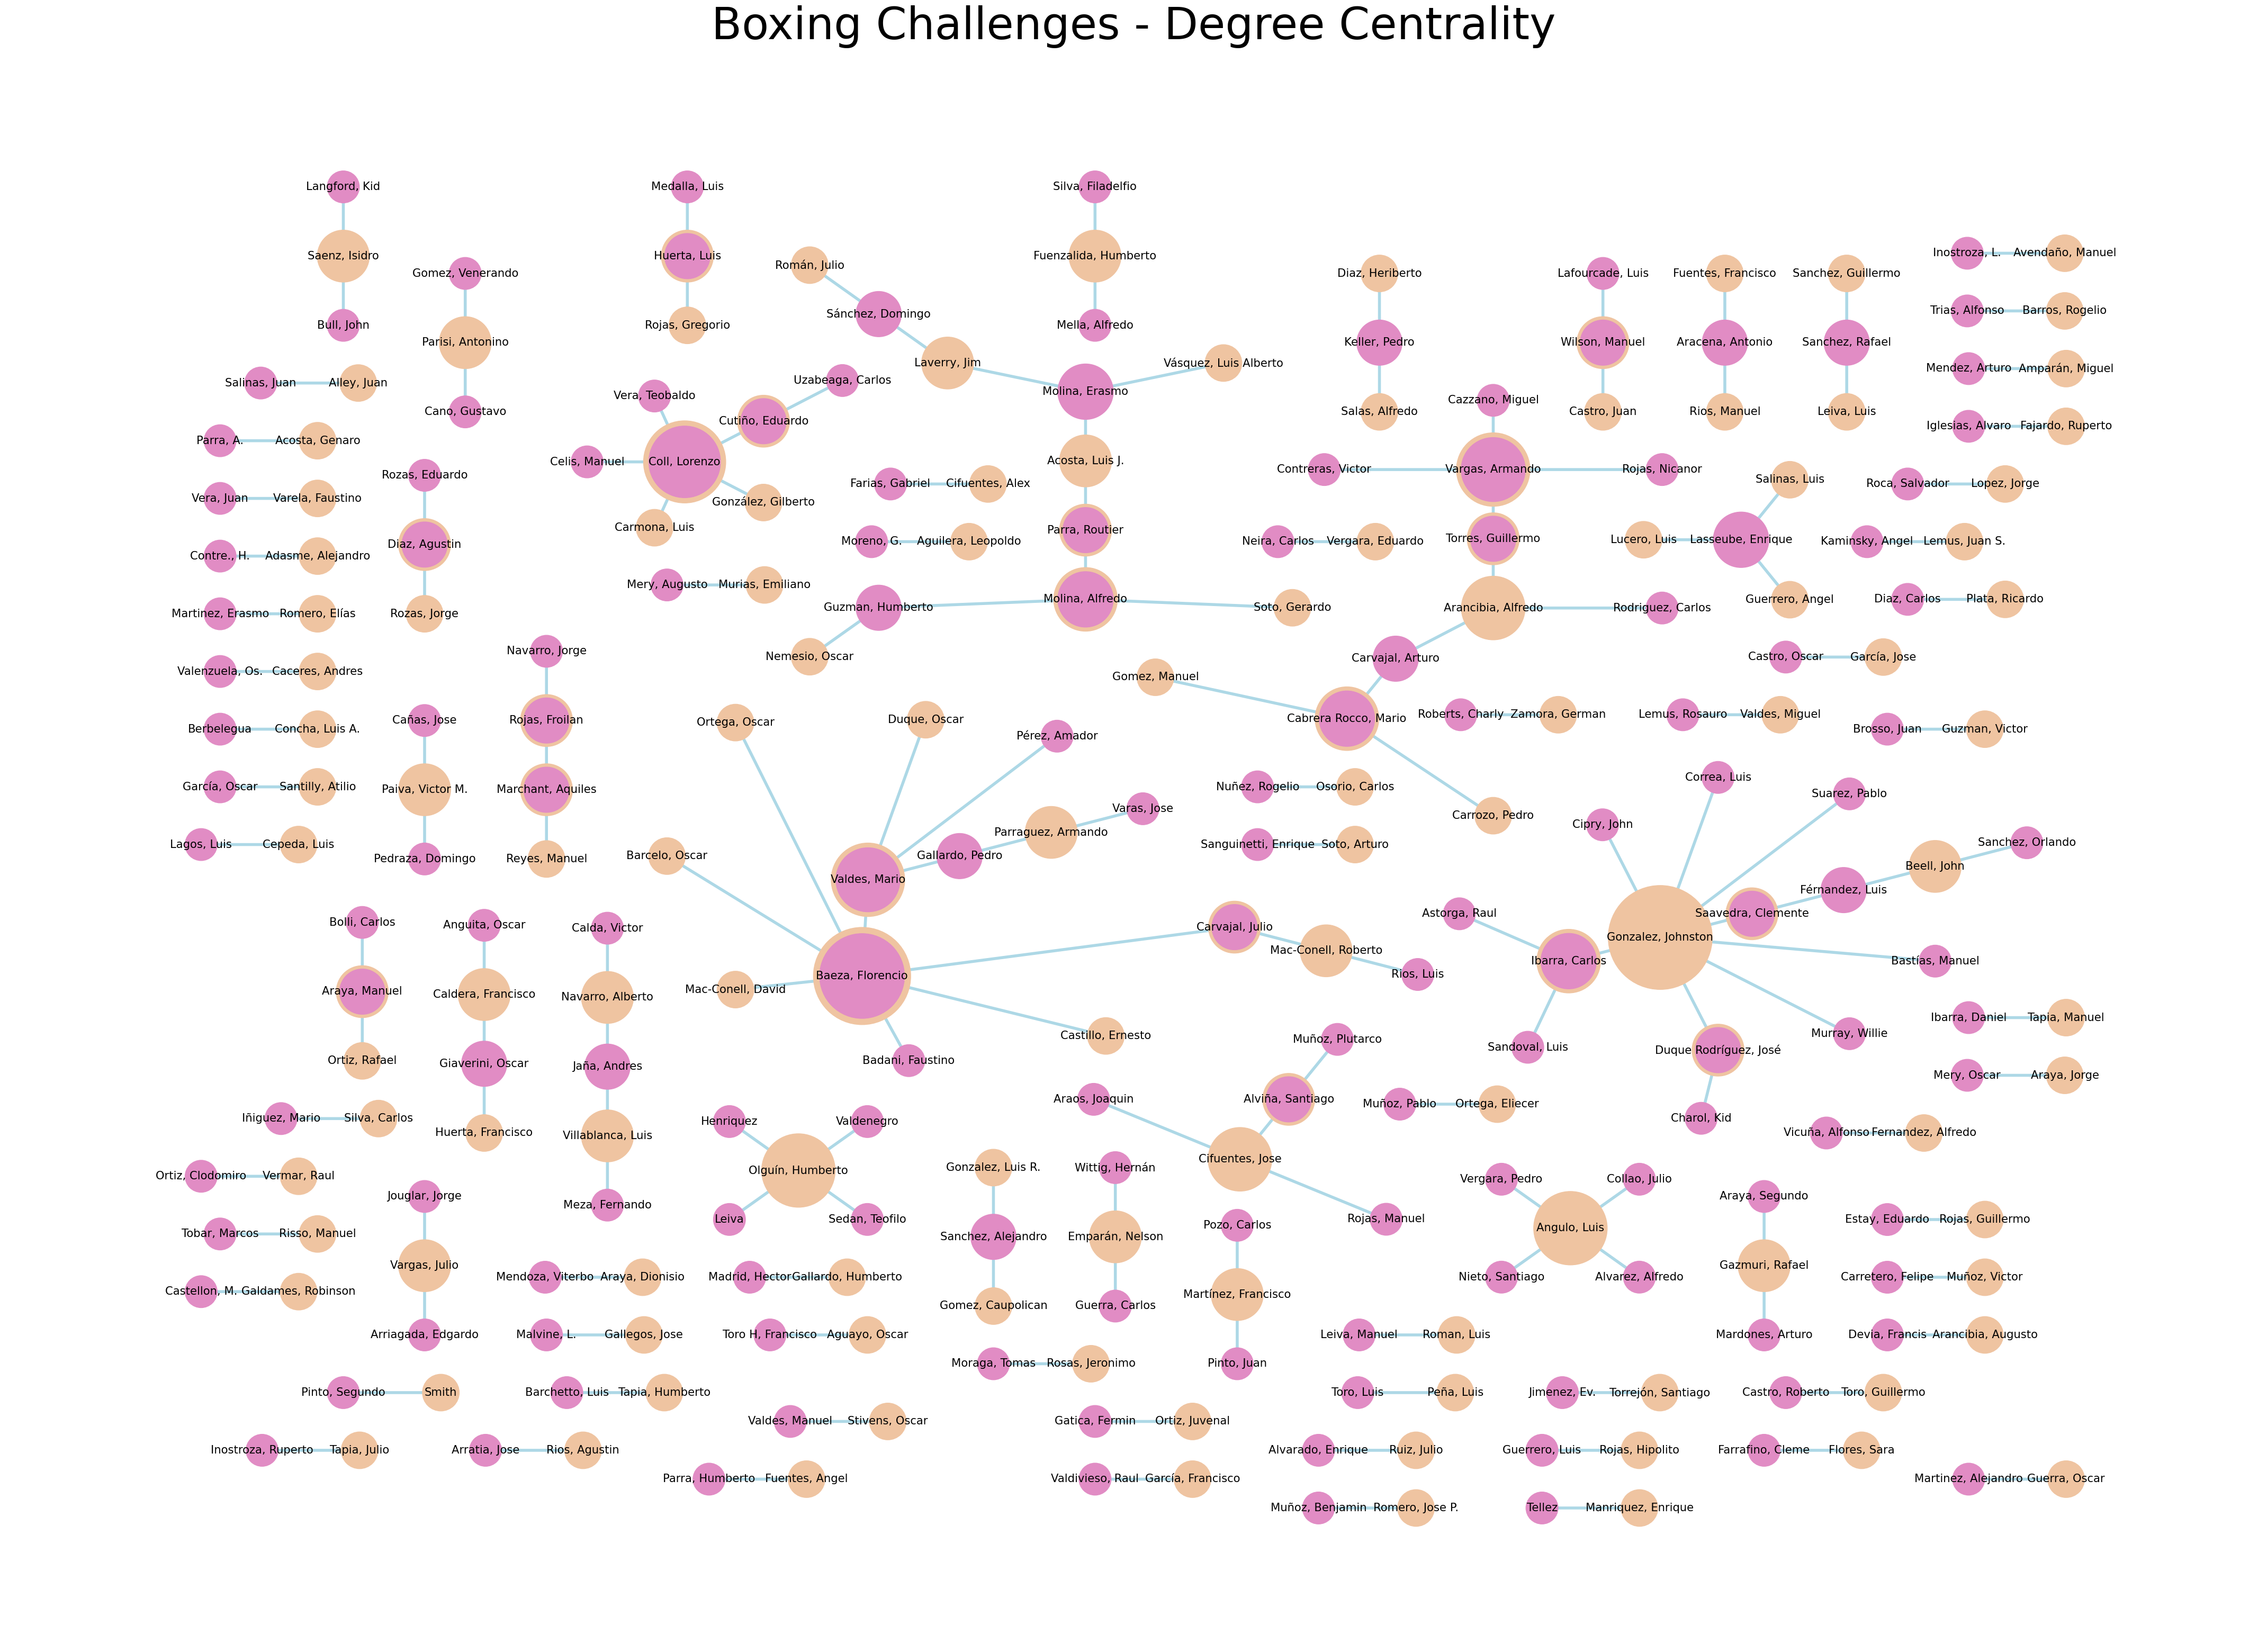

In [47]:
# 5. drawing the graph visualization
fig, ax = plt.subplots(figsize=(55, 40), dpi=100)
# 5.1 drawing labels
nx.draw_networkx_edges(CH, pos, edge_color='lightblue', arrows=True, arrowstyle ='-', arrowsize=65, width=4.0)
nx.draw_networkx_nodes(CH, pos, nodelist=challengers, node_size=size, node_color ='#EFC4A1')
nx.draw_networkx_nodes(CH, pos, nodelist=challenged, node_size=size_ed, node_color ='#E18CC4')
challengers_dict = dict(zip(challengers, challengers))
nx.draw_networkx_labels(CH, pos, labels = node_labels, font_size=15.2)
#nx.draw_networkx_edge_labels(CH, pos, edge_labels = edge_labels, font_size= 10)
#nx.draw_networkx_labels(CH, pos, labels=challenged_dict)
#ax.margins(0.1, 0.05)
#fig.tight_layout()
plt.axis("off")
plt.title('Boxing Challenges - Degree Centrality', fontsize=60)
fig = plt.gcf()
#fig.savefig('figure_9.pdf', dpi=100, format='pdf', bbox_inches='tight') 
#fig.savefig('graph_centrality_02.svg', dpi=1200, format='svg', bbox_inches='tight') 
#fig.savefig('figure_9.png', dpi=100, format='png', bbox_inches='tight')
plt.show()

**Network Graph Visualization**
>The image shows a representation of the graph in which the yellow nodes correspond to challenging boxers and the pink nodes to boxers being challenged. When a pink node has a yellow rim, it indicates that a boxer was both challenged and got also challenged by another fighter.  The visualization pretty much reassures the basic traits of the graph obtained with the metrics applied before: very low density and a relatively low degree centrality of even the 10 well most connected nodes. This traits are in part explained by the nature of boxing challenges --a one-to-one relationship--. Accordingly, most of the graph displays pairs of two boxers challenging each other. Another bunch of connections reveals triads and tetrads of boxers' connections. The size of both the yellow boxers (challenging boxers) and pink boxers (challenged boxers) reflects the amount of connections for challengers and challenged fighters. The graph shows that only 10 fighters are connected with more than 3 other boxers. 

>**Analysis of a Cluster**. The visualization allows us to identify particular clusters with interesting paths created by the direct and indirect connections. For instance, the path between Johnston Gonzalez(id: 639) and Orlando Sanchez (id: 535) can be analyzed with the `nx.shortest_path()` which highlights the minimum number of edges that the path passes through. The shortest path metric analyzes the shortest possible series of nodes and edges that stand between any two nodes. There are 4 boxing connections separating Johnston Gonzalez from <a href='https://boxrec.com/en/box-pro/339185'> Orlando Sanchez </a>. Based on a preliminary analysis, they are relatively close to one another, and their careers might have been <a href='https://boxrec.com/en/box-pro/338883'> quite similar </a>. The data collected in boxrec.com shows that  both boxers fought no more than 15 professional fights, being the winners in only one bout each.  

In [53]:
#creating an object named johnston_path by using the nx.shortest_path() built-in function
johnston_path = nx.shortest_path(CH, source= 639, target= 535)

print("Shortest Path: \n-----------------\n", 
      "Shortest path between Johnson Gonzalez and Orlando Sanchez", johnston_path)

Shortest Path: 
-----------------
 Shortest path between Johnson Gonzalez and Orlando Sanchez [639, 1026, 276, 1138, 535]


**Conclusion**
>Analyzing boxing challenges through the techniques and methods of Social Network Analysis opens up a whole set of possibilities for the data that I have collected about Chile's amateur boxing database. Network Analysis allowed for the discovery of hidden and complex patterns that are not easily discoverable by a manual examination of the data. Since this project is still a work in progress, and it is right now only in an early and exploratory stage, I will dedicate this conclusion to delineate what my goals are to keep moving this project forward.

>1) **The role of the press**. The press played a crucial role in the creation and sustaining of a multilayered boxing circuit in the 1920's. The importance of the printing press and the media has been already underlined by sport historians and popular culture scholars, although the role of the press as a broker and intermediary between crucial industry actors in Chile hasn't been developed yet. The boxing challenges offer an entry point to get a better understanding of the role of newspapers and sporting magazines, not only for sports activities accustomed to being in the media spotlight, but also for ground level and everyday sport practices. The data shows that the printing press played a role in emerging boxing circuits and also in large scale professional spectacles, both in big cities and small towns. The next step for this project is to include the specific roles of the press into the network analytics. In some cases, the press would only serve as a platform for the publication of a challenge; in some other cases, the offices of the periodical publication would serve as a meeting point and also as the guarantor of the contracts signed.

>2) **The data**. The sample used for this exploratory analysis is quite small. It comprises 178 challenges collected exclusively from digitized newspapers and sport publications between 1920-1930. The next step is to expand the database by collecting data from non-digitized newspapers and magazines stored at the Chilean National Library. Having a more comprehensive database to which apply the Social Network Analysis methods will help to clarify the big picture of the development of professional and amateur boxing in the 1920’s, and how this process connects with the social transformation that Latin American Societies were experiencing throughout the decade. These transformations included Latin America’s increasing connection with mass media and cultural markets beyond their national borders, the growing ascendance of urban middle classes as consumers of sports and popular culture, and the expanding political participation of disenfranchised segments of society in urban centers. 

>3) **The methods**. Social Network Analysis is a very complex field with large and diversified applications. I barely managed to scratch the surface of the possibilities afforded by the discipline. My main focus so far has been to collect and prepare the data for the construction of a network graph, and to learn the coding to perform basic analytics by using the NetworkX python package. In future explorations, I hope to include time-series analytics to stop treating the whole decade as one single unit of time. I would also aim to perform subgraph analysis and explore clusters, communities and specific cliques within the data. Finally, the analysis should include the spatial element in more detail; so far I did not include the city and place of publication into the analysis, although I have collected that specific piece of data in the database. It would be interesting in further explorations to start understanding how boxing circuits gained traction in less densely populated areas, and what was the role of local media in the consolidation of those practice and spectacle networks. 
